PIPELINE 3: DATASET BAN ĐẦU -> UNSUPERVISED LEARNING -> SVM

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

df = pd.read_csv('../DatasetUL.csv')

In [9]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,dbscan_cluster,dbscan_outlier,gmm_prob_0,gmm_prob_1,gmm_prob_2
0,2,0,1,2,0,0,0,224,2017,10,...,0,0,65.00,0,1,0,0,3.040454e-14,1.0,0.0
1,2,0,2,3,3,0,0,5,2018,11,...,0,0,106.68,1,1,-1,1,2.803105e-16,1.0,0.0
2,1,0,2,1,0,0,0,1,2018,2,...,0,0,60.00,0,0,1,0,4.622906e-11,1.0,0.0
3,2,0,0,2,0,0,0,211,2018,5,...,0,0,100.00,0,0,2,0,1.015229e-11,1.0,0.0
4,2,0,1,1,3,0,0,48,2018,4,...,0,0,94.50,0,0,-1,1,5.874644e-16,1.0,0.0


Phân tách đặc trưng và biến mục tiêu

In [10]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

Chuẩn hóa dữ liệu

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Chia tập train/test

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (26668, 22)
X_test shape: (6668, 22)
y_train shape: (26668,)
y_test shape: (6668,)


Train model

In [ ]:
model = SVC(kernel='rbf', C=1, gamma=0.01) 
model.fit(X_train, y_train)

SVC(C=1, gamma=0.01)

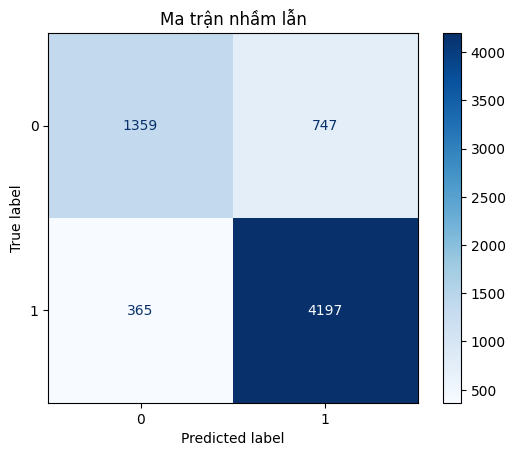

Kết quả:

              precision    recall  f1-score   support

           0       0.79      0.65      0.71      2106
           1       0.85      0.92      0.88      4562

    accuracy                           0.83      6668
   macro avg       0.82      0.78      0.80      6668
weighted avg       0.83      0.83      0.83      6668



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=['0', '1'])
disp.plot(cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.grid(False)
plt.show()

print("Kết quả:\n")
print(classification_report(y_test, y_pred))